In [32]:
import numpy as np
import matplotlib.pyplot as plt
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)


Theta:
 [[0.65306531]
 [0.67129519]]


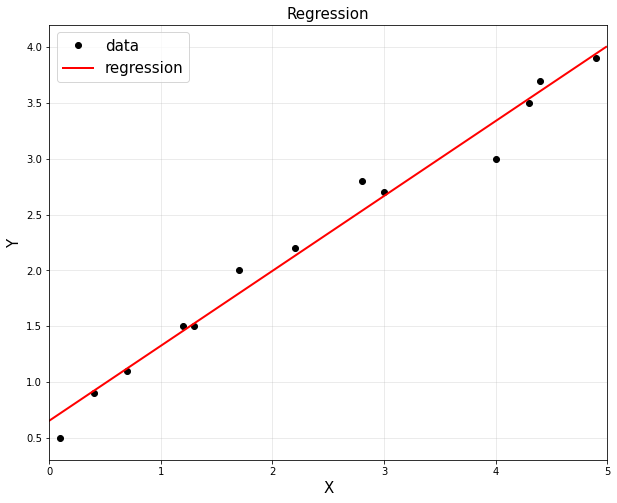

In [33]:
# solution 1) Linear Algebra
m = y.shape[0]
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print('Theta:\n', theta)

# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()


[[0.65222743]
 [0.67154838]]


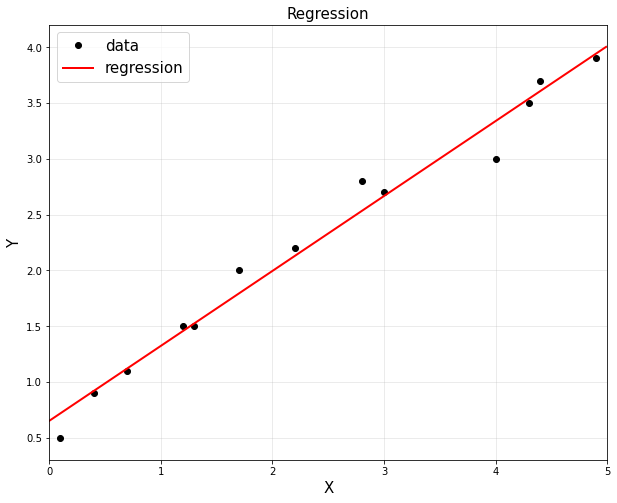

In [34]:
# Solve using Gradiant Descent

theta = np.random.randn(2,1)
theta = np.asmatrix(theta)

alpha = 0.001

for _ in range(1000):
    df = 2*(A.T*A*theta - A.T*y)
    theta = theta - alpha * df
    
print(theta)

# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()


theta:
 [[0.63333333]
 [0.66666667]]
theta:
 [[1.25042815]
 [0.41766509]]


C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


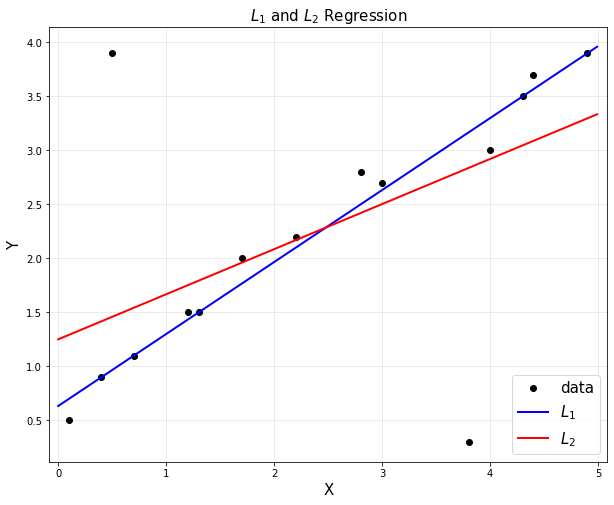

In [35]:
# Solve using CVXPY Optimization
import cvxpy as cvx

x = np.vstack([x, np.array([0.5,3.8]).reshape(-1,1)])
y = np.vstack([y, np.array([3.9,0.3]).reshape(-1,1)])

A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta1 = cvx.Variable([2,1])
obj1 = cvx.Minimize(cvx.norm(A*theta1-y,1))
cvx.Problem(obj1,[]).solve()

theta2 = cvx.Variable([2,1])
obj2 = cvx.Minimize(cvx.norm(A*theta2-y,2))
cvx.Problem(obj2,[]).solve()

print("theta:\n",theta1.value)
print("theta:\n",theta2.value)

# to plot data in one plot
plt.figure(figsize = (10, 8))
plt.title('$L_1$ and $L_2$ Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = 'data')

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth=2, label = '$L_1$')
plt.plot(xp, yp2, 'r', linewidth=2, label = '$L_2$')
plt.legend(fontsize = 15)
plt.axis('equal')
plt.xlim([0, 5])
plt.grid(alpha = 0.3)
plt.show()


In [25]:
# Scikit-Learn : Regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x,y)

print(reg.coef_)
print(reg.intercept_)

[[0.67129519]]
[0.65306531]


In [26]:
# polynomial Regression
n = 100
x = -5 + 15*np.random.rand(n,1)
noise = 10*np.random.randn(n,1)

y = 10 + 1*x + 2*x**2 + noise

A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print('theta:\n', theta)



theta:
 [[9.00543711]
 [1.01673284]
 [2.00850031]]


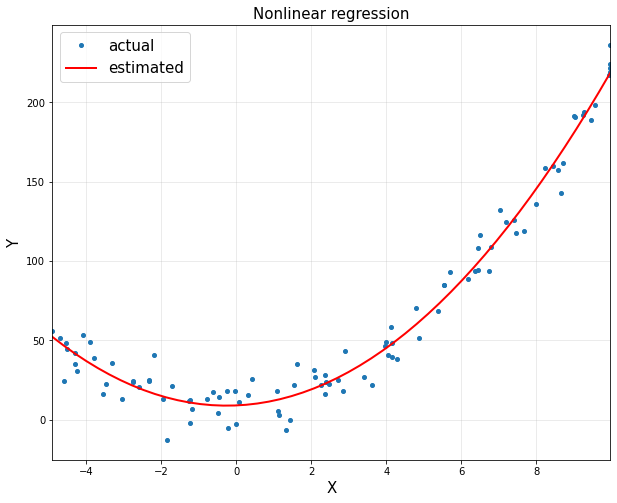

In [27]:
xp = np.linspace(np.min(x), np.max(x))
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', markersize = 4, label = 'actual')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'estimated')

plt.title('Nonlinear regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

In [42]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

# d = 10
# u = np.linspace(-4.5, 4.5, d)
# sigma = 0.2


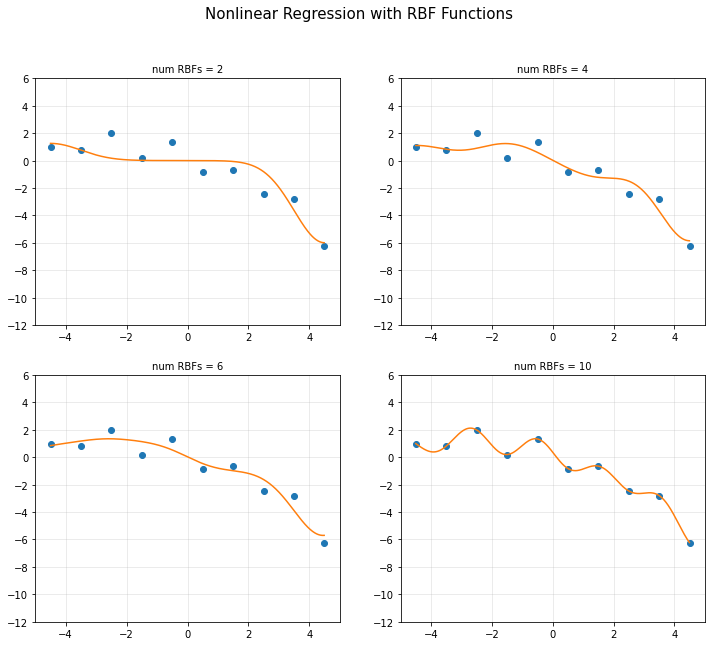

In [43]:
# RBF
d = [2, 4, 6, 10]
sigma = 1

plt.figure(figsize = (12, 10))
for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2,2,k+1)
    plt.plot(x, y, 'o')
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('num RBFs = {}'.format(d[k]), fontsize = 10)
    plt.grid(alpha = 0.3)

plt.suptitle('Nonlinear Regression with RBF Functions', fontsize = 15)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 14 times so far.

  warnings.warn(msg, UserWarning)


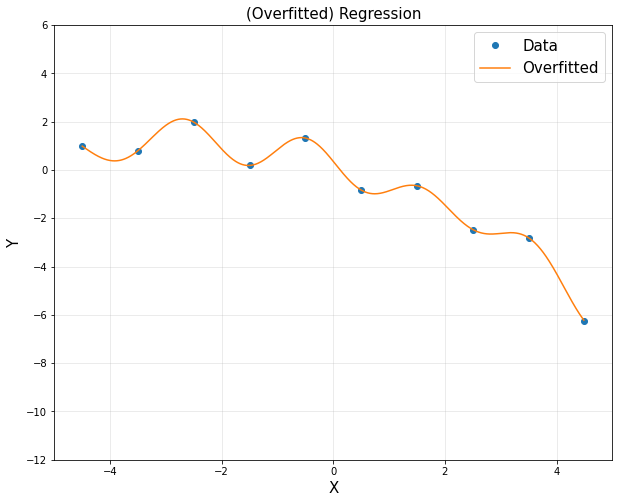

In [44]:
# regularization

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)
    
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15 times so far.

  warnings.warn(msg, UserWarning)


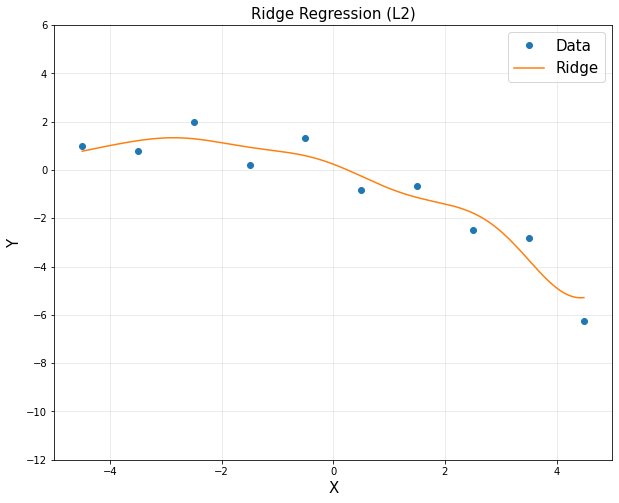

In [45]:
# ridge regression

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

lamb = 0.1    
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y) + lamb * cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Ridge')
plt.title('Ridge Regression (L2)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 16 times so far.

  warnings.warn(msg, UserWarning)


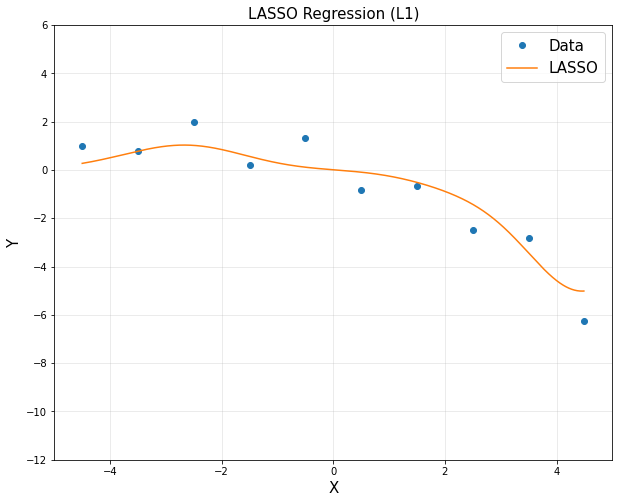

In [46]:
# Lasso regression

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

lamb = 2 
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y) + lamb*cvx.norm(theta,1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'LASSO')
plt.title('LASSO Regression (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 27 times so far.

  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 28 times so far.

  warnings.warn(msg, UserWarning)


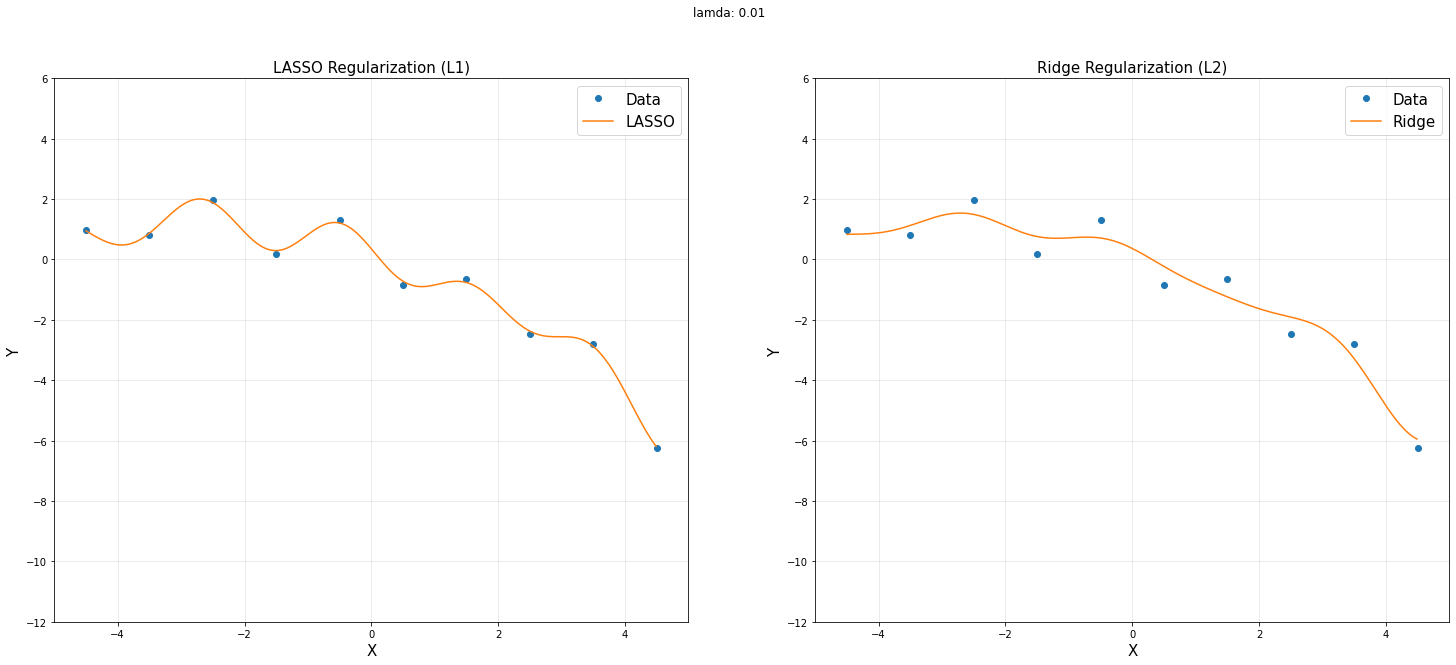

In [52]:
# LASSO vs Ridge

lamb = 0.01
theta1 = cvx.Variable([d,1])
obj1 = cvx.Minimize(cvx.sum_squares(A*theta1-y) + lamb*cvx.norm(theta1,1))
prob1 = cvx.Problem(obj1).solve()

yp1 = rbfbasis*theta1.value

theta2 = cvx.Variable([d,1])
obj2 = cvx.Minimize(cvx.sum_squares(A*theta2-y) + lamb*cvx.sum_squares(theta2)) #cvx.norm(theta2,2)
prob2 = cvx.Problem(obj2).solve()

yp2 = rbfbasis*theta2.value

plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.title("LASSO Regularization (L1)", fontsize = 15)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.plot(x,y,'o', label = "Data")
plt.plot(xp, yp1, label = "LASSO")
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)

plt.subplot(1,2,2)
plt.title("Ridge Regularization (L2)", fontsize = 15)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.plot(x,y,'o', label = "Data")
plt.plot(xp, yp2, label = "Ridge")
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)

plt.suptitle("lamda: {}".format(lamb))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 30 times so far.

  warnings.warn(msg, UserWarning)


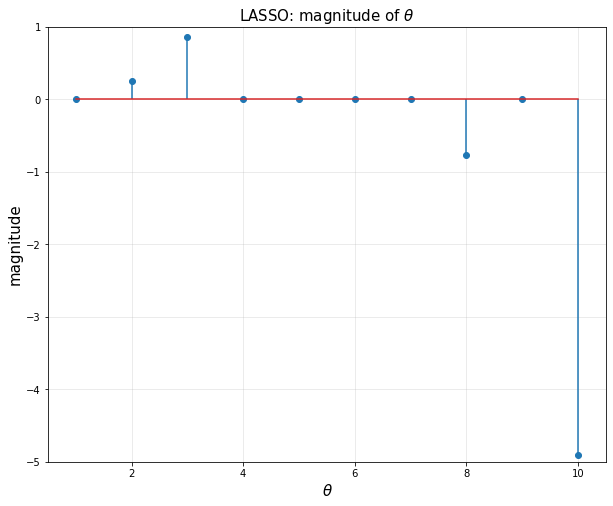

In [54]:
lamb = 2
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.title(r'LASSO: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.arange(1,11), theta.value)
plt.xlim([0.5,10.5])
plt.ylim([-5,1])
plt.grid(alpha = 0.3)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 31 times so far.

  warnings.warn(msg, UserWarning)


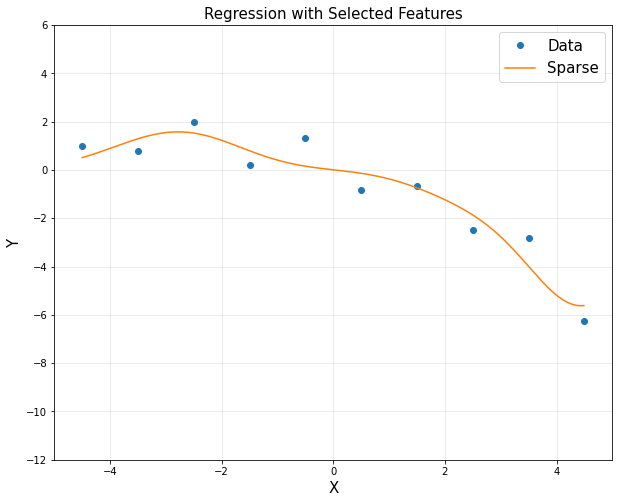

In [55]:
d = 4
u = np.array([-3.5, -2.5, 2.5, 4.5])
sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)
    
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.norm(A*theta-y,2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')l
plt.plot(xp, yp, label = 'Sparse')
plt.title('Regression with Selected Features', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()
